This based off of the tutorial from scanpy using pbmc 3K.
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

And heavily influenced by https://github.com/theislab/scanpy_usage/blob/master/170503_zheng17/zheng17.ipynb

We are interesting in doing 1month vs 30month, male kidney

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
from matplotlib.pyplot import rc_context

import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.23.5 scipy==1.8.1 pandas==1.5.3 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


## Open files

In [2]:
data_path = f"{os.getcwd()}/../../data/bulk_data/kidney_aging/"

# file downloaded from SeuratData then converted to h5ad 



in_file = f"{data_path}/GSE132040_190214.csv"
meta_file = f"{data_path}/GSE132040_MACA_Bulk_metadata.csv"
results_file = f"{data_path}/kidney_bulk_processed.h5ad"

with open(in_file) as your_data:
    adata = ad.read_csv(your_data, delimiter=',')
    adata = adata.transpose()
    
# add in all the metadata
obs_df = pd.read_csv(meta_file)
obs_df = obs_df.set_index(obs_df["Sample name"] + ".gencode.vM19")

# remake anndata
adata = ad.AnnData(adata.X, obs=obs_df, var=adata.var)
adata


AnnData object with n_obs × n_vars = 947 × 54357
    obs: 'Sample name', 'title', 'source name', 'organism', 'characteristics: age', 'characteristics: developmental stage', 'characteristics: sex', 'molecule', 'description', 'processed data file ', 'raw file', 'BioSample', 'Instrument Model'

In [3]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

# remove non-gene IDs
gene_idx = np.where(np.logical_not(adata.var_names.str.startswith('__')))[0]
adata = adata[:, gene_idx]



In [4]:
adata.var_names[np.where(adata.var_names.str.startswith('__'))]

Index([], dtype='object')

In [5]:
# format the tissue 
adata.obs["tissue"] = [x.split("_")[0] for x in adata.obs["source name"]]

# subset to kidney
adata = adata[np.where(adata.obs["tissue"] == "Kidney")]

adata.obs

<ipython-input-5-764349bdc2ec>:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["tissue"] = [x.split("_")[0] for x in adata.obs["source name"]]


,Sample name,title,source name,organism,characteristics: age,characteristics: developmental stage,characteristics: sex,molecule,description,processed data file,raw file,BioSample,Instrument Model,tissue
Sample name,,,,,,,,,,,,,,
A5_384Bulk_Plate2_S5.gencode.vM19,A5_384Bulk_Plate2_S5,Tabula Muris Senis (bulk RNA seq),Kidney_45,Mus musculus C57/BL6,9,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127254,SAMN11854611,Illumina NovaSeq 6000,Kidney
B14_384Bulk_Plate1_S38.gencode.vM19,B14_384Bulk_Plate1_S38,Tabula Muris Senis (bulk RNA seq),Kidney_38,Mus musculus C57/BL6,21,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9126845,SAMN11854640,Illumina NovaSeq 6000,Kidney
B17_384Bulk_Plate2_S41.gencode.vM19,B17_384Bulk_Plate2_S41,Tabula Muris Senis (bulk RNA seq),Kidney_44,Mus musculus C57/BL6,1,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127582,SAMN11854648,Illumina NovaSeq 6000,Kidney
B22_384Bulk_Plate1_S46.gencode.vM19,B22_384Bulk_Plate1_S46,Tabula Muris Senis (bulk RNA seq),Kidney_52,Mus musculus C57/BL6,6,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127129,SAMN11854660,Illumina NovaSeq 6000,Kidney
B23_384Bulk_Plate2_S47.gencode.vM19,B23_384Bulk_Plate2_S47,Tabula Muris Senis (bulk RNA seq),Kidney_36,Mus musculus C57/BL6,1,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127128,SAMN11854663,Illumina NovaSeq 6000,Kidney
B4_384Bulk_Plate1_S28.gencode.vM19,B4_384Bulk_Plate1_S28,Tabula Muris Senis (bulk RNA seq),Kidney_26,Mus musculus C57/BL6,15,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127375,SAMN11854667,Illumina NovaSeq 6000,Kidney
B6_384Bulk_Plate1_S30.gencode.vM19,B6_384Bulk_Plate1_S30,Tabula Muris Senis (bulk RNA seq),Kidney_46,Mus musculus C57/BL6,1,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127169,SAMN11854673,Illumina NovaSeq 6000,Kidney
B9_384Bulk_Plate3_S33.gencode.vM19,B9_384Bulk_Plate3_S33,Tabula Muris Senis (bulk RNA seq),Kidney_35,Mus musculus C57/BL6,21,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9126708,SAMN11854683,Illumina NovaSeq 6000,Kidney
C16_384Bulk_Plate1_S64.gencode.vM19,C16_384Bulk_Plate1_S64,Tabula Muris Senis (bulk RNA seq),Kidney_25,Mus musculus C57/BL6,9,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9126753,SAMN11854704,Illumina NovaSeq 6000,Kidney


In [6]:
# how many of each mouse
tab = adata.obs.groupby(['characteristics: age', 'characteristics: sex']).size()

tab.unstack()

characteristics: sex,f,m
characteristics: age,,
1,2.0,4.0
12,2.0,4.0
15,2.0,4.0
18,2.0,4.0
21,2.0,4.0
24,NaN,4.0
27,NaN,4.0
3,2.0,3.0
6,2.0,4.0


In [7]:

# subset to months 1,3,24,27
# and only males
months_keep = ["1","3","24","27"]

adata = adata[np.where(np.isin(adata.obs["characteristics: age"], months_keep))]
adata = adata[np.where(adata.obs["characteristics: sex"] == "m")]

# how many of each mouse
tab = adata.obs.groupby(['characteristics: age', 'characteristics: sex']).size()
tab.unstack()

characteristics: sex,m
characteristics: age,
1,4
24,4
27,4
3,3


## format the obs for BuDDI

In [8]:
# now make pairings of samples
# merge them
samp_dict = {'samp2': ["Kidney_44", "Kidney_23", "Kidney_17", "Kidney_50", "Kidney_34", "Kidney_37", "Kidney_15"],
             'samp3': ["Kidney_28", "Kidney_49", "Kidney_20", "Kidney_9", "Kidney_47", "Kidney_41", "Kidney_3", "Kidney_14"]}

# Initialize empty column in cell metadata
adata.obs['sample_id'] = np.nan

# Generate new assignments
for i in samp_dict.keys():
    ind = pd.Series(adata.obs["source name"]).isin(samp_dict[i])
    adata.obs.loc[ind,'sample_id'] = i



def get_stim_id(in_str):
    out_str = "STIM"
    if in_str == "24" or in_str == "27":
        out_str = "CTRL"
           
    return(out_str)

adata.obs['stim'] = [get_stim_id(str(x)) for x in adata.obs["characteristics: age"].tolist()]
adata.var['gene_ids'] = adata.var.index.tolist()


<ipython-input-8-05e5602a720d>:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['sample_id'] = np.nan


In [9]:
# how many of each mouse
tab = adata.obs.groupby(['stim', 'sample_id']).size()
tab.unstack()

sample_id,samp2,samp3
stim,,
CTRL,4,4
STIM,3,4


## Preprocessing

normalizing counts per cell
    finished (0:00:00)


/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


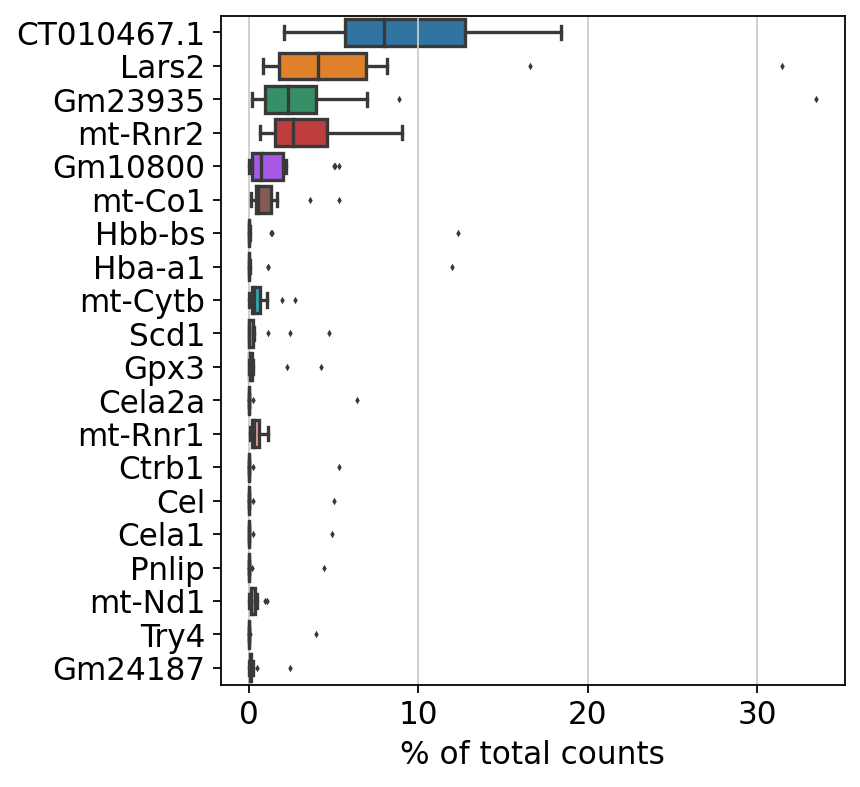

In [10]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [11]:
results_file

'/beevol/home/davidson/checkouts/sc_bulk_ood/sc_preprocessing/0_qc_notebooks/../../data/bulk_data/kidney_aging//kidney_bulk_processed.h5ad'

In [12]:
# write it out before normalization
del adata.raw
adata.write(results_file)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


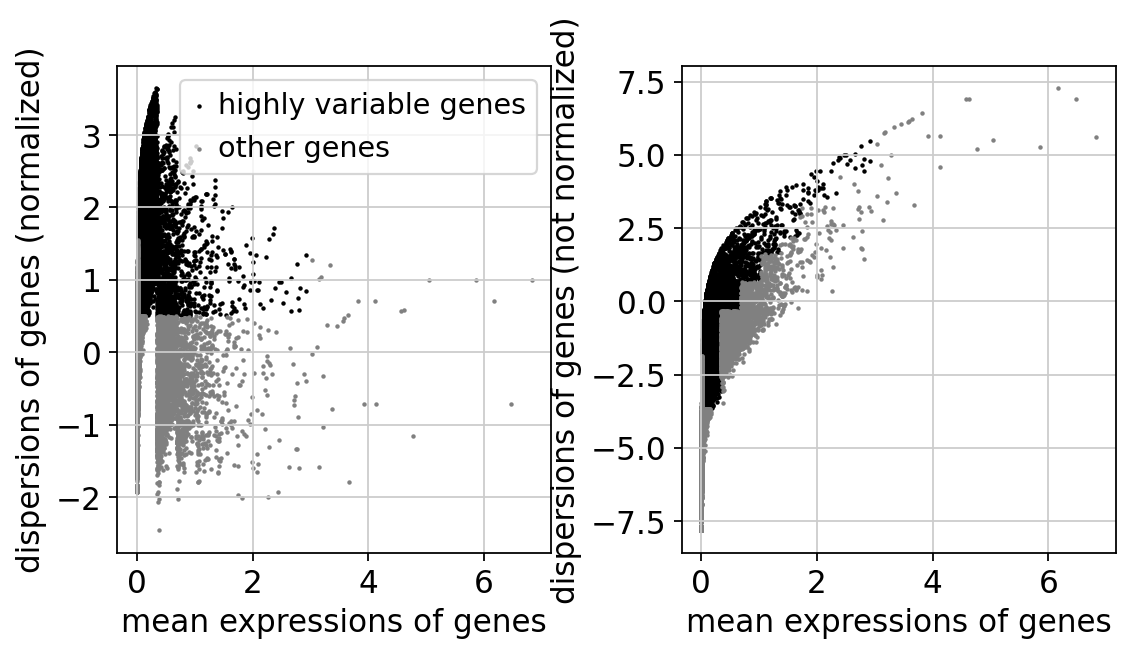

In [13]:
# normalize to 10K counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)

# log data
sc.pp.log1p(adata)

# get high variance genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# and plot
sc.pl.highly_variable_genes(adata)

# now store the raw version of the data for our use later
adata.raw = adata


In [14]:
# now process the counts further for doing DE 
# analysis and the cell clustering
adata = adata[:, adata.var.highly_variable]

# scale the genes
sc.pp.scale(adata, max_value=10)

/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


## PCA

computing PCA
    on highly variable genes
    with n_comps=10
    finished (0:00:00)


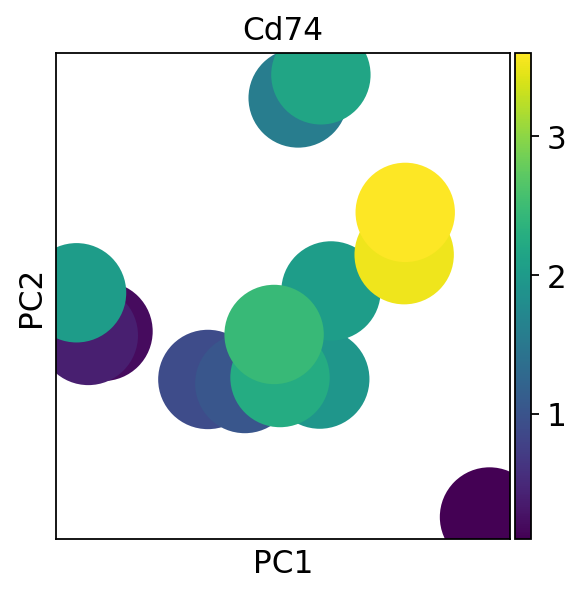

In [15]:
sc.tl.pca(adata, n_comps=10)
sc.pl.pca(adata, color='Cd74')


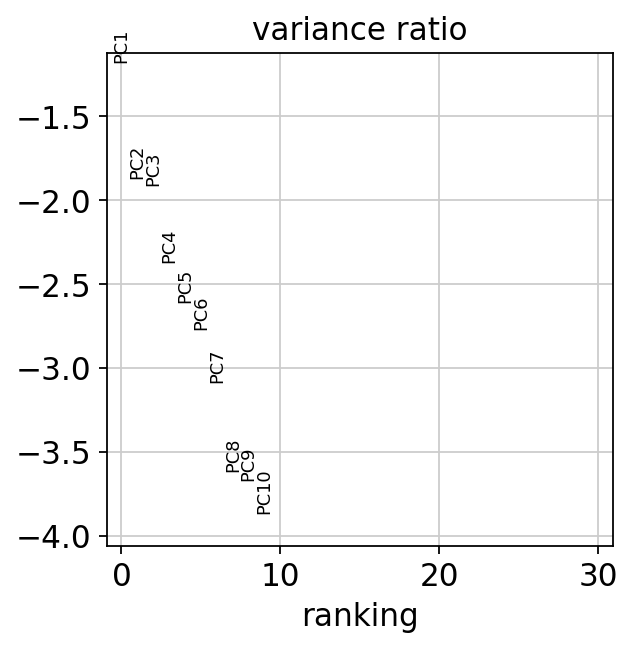

In [16]:
sc.pl.pca_variance_ratio(adata, log=True)


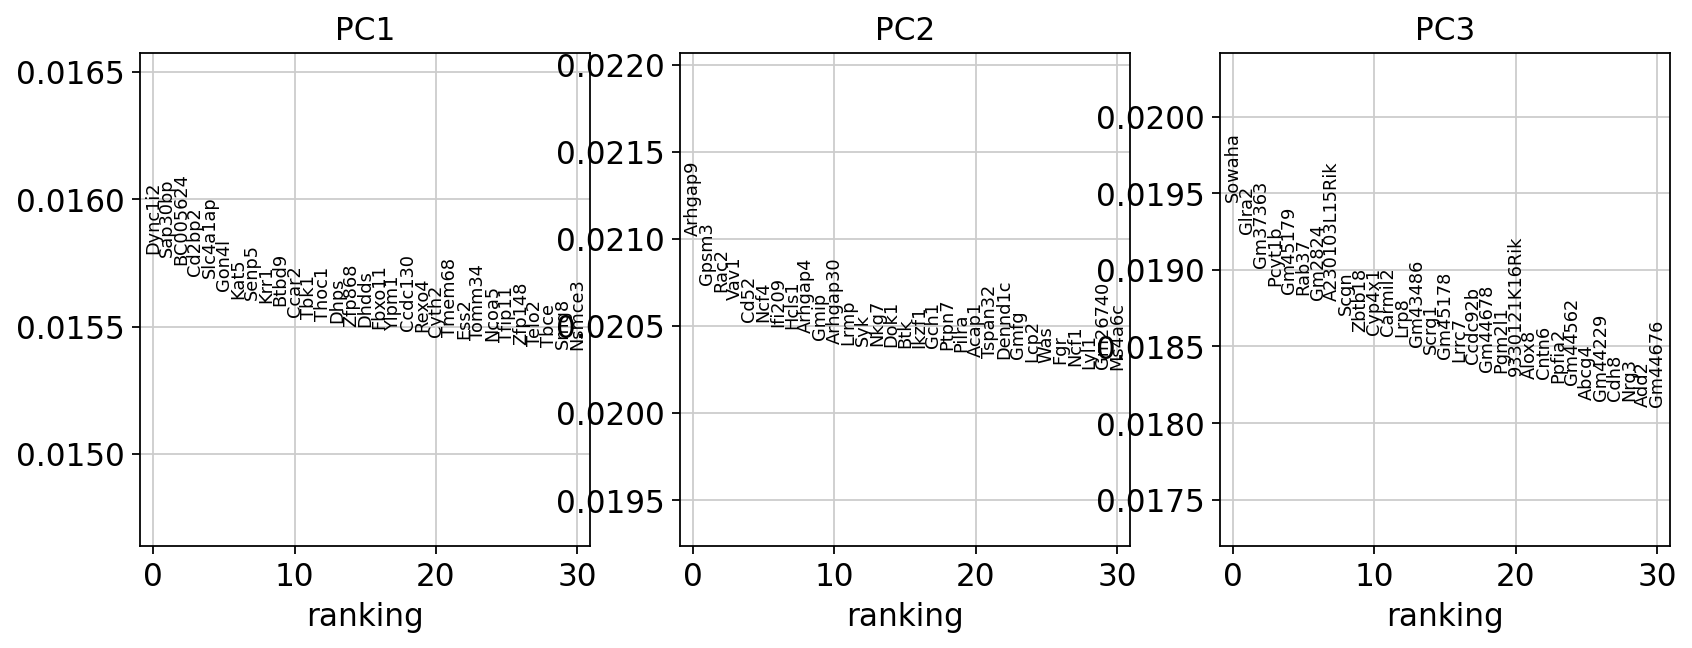

In [17]:
sc.pl.pca_loadings(adata, include_lowest=False)
